In [69]:
include("MDPModelFunctions.jl")
using StatsBase
using PythonPlot

In [104]:
# To simulate:

# Load2 Pre
# Load 2 Retro
# Load 2 Neutral

# Load 4 Pre
# Load 4 Retro
# Load 4 Neutral

In [105]:
# let's just do a grid search over parameters again...

In [149]:
function cowan_k(p_corr, num_obj)
   return num_obj .* (p_corr .* 1 .- p_corr)
end

cowan_k (generic function with 1 method)

In [230]:
function cowan_k(p_corr, num_obj)
   return num_obj .* (p_corr - (1 .- p_corr))
end



epsilon = .8
N_Quanta = 6 # 7 is about the max... 


function sim_exp1(epsilon, N_Quanta)
    """
    d_all: is prob correct over time for 3 consitions
    row 1: precue
    row2: neutral
    row3: retrocue
    """
    N_Object_Vals = [2,4]

    N_TimeSteps_Pre = 100
    N_TimeSteps_Post = 100
    N_TimeSteps = N_TimeSteps_Pre + N_TimeSteps_Post

    d_all = zeros(3, length(N_Object_Vals), N_TimeSteps)

    for (obj_idx, N_Objects) in enumerate(N_Object_Vals)

        d_precue = simulate_precue(N_Quanta, N_Objects, epsilon, N_TimeSteps)
        d_precue = d_precue[:,1]
        d_all[1,obj_idx,:] = d_precue

        d_neutral = simulate_delayed_memory(N_Quanta, N_Objects, epsilon, N_TimeSteps)
        d_neutral = d_neutral[:,1]
        d_all[2,obj_idx,:] = d_neutral

        d_retro, _ = simulate_retrocue(N_Quanta, N_Objects, epsilon, N_TimeSteps_Pre, N_TimeSteps_Post)
        d_all[3,obj_idx,:] = d_retro

    end
    
    return d_all
end




sim_exp1 (generic function with 1 method)

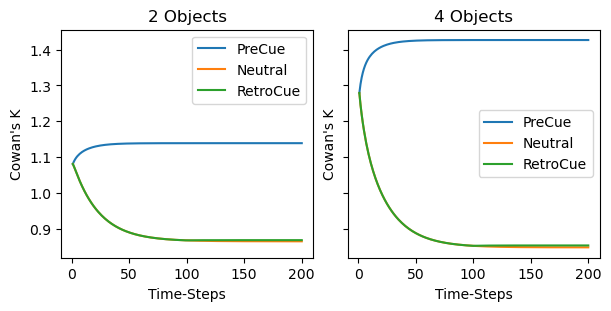

In [228]:
fig,ax = subplots(1, 2, figsize = (6,3), constrained_layout=true, sharey=true)

for (obj_idx, N_Objects) in enumerate(N_Object_Vals)
    
    TS = 1:N_TimeSteps
    
    d_precue = cowan_k(d_all[1,obj_idx,:], N_Objects);
    ax[obj_idx-1].plot(TS, d_precue, label = "PreCue")
    
    d_neutral = cowan_k(d_all[2,obj_idx,:], N_Objects);
    ax[obj_idx-1].plot(TS, d_neutral, label = "Neutral")
    
    d_retro = cowan_k(d_all[3,obj_idx,:], N_Objects);
    ax[obj_idx-1].plot(TS, d_retro, label = "RetroCue")
    ax[obj_idx-1].legend()
    ax[obj_idx-1].set_xlabel("Time-Steps")
    
    ax[obj_idx-1].set_ylabel("Cowan's K")
    
    ax[obj_idx-1].set_title(string(N_Objects) * " Objects")

end

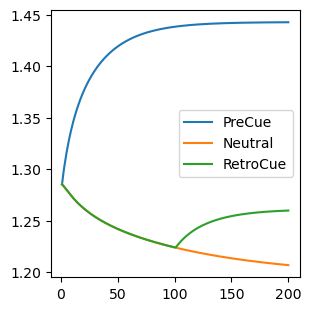

Python: <matplotlib.legend.Legend object at 0x2acbdcfd0>

In [212]:
fig,ax = subplots(1, figsize = (3,3), constrained_layout=true)
TS = 1:N_TimeSteps
ax.plot(TS, 2*d_precue, label = "PreCue")
ax.plot(TS, 2*d_neutral, label = "Neutral")
ax.plot(TS, 2*d_retro, label = "RetroCue")
ax.legend()

Generating All States
Computing Optimal Policy
Simulating Episode


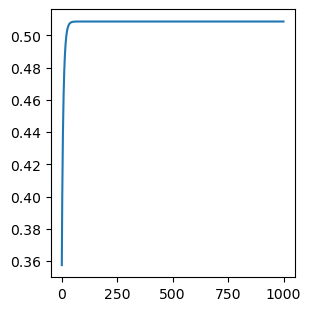

Python: [<matplotlib.lines.Line2D object at 0x296a8e3d0>]

In [9]:
N_Objects = 2
N_TimeSteps = 1000

epsilon = .4
N_Quanta = 5

# simulate this for a variety of quanta values...
prob_remember_object = simulate_precue(N_Quanta, N_Objects, epsilon, N_TimeSteps)
fig,ax = subplots(1, figsize = (3,3), constrained_layout=true)
ax.plot(1:N_TimeSteps, prob_remember_object[:,1])

In [9]:
prob_remember_object

1000×2 Matrix{Float64}:
 0.736991  0.736991
 0.754593  0.754593
 0.758589  0.758589
 0.759184  0.759184
 0.758929  0.758929
 0.758462  0.758462
 0.757944  0.757944
 0.757413  0.757413
 0.75688   0.75688
 0.756347  0.756347
 0.755815  0.755815
 0.755285  0.755285
 0.754755  0.754755
 ⋮         
 0.531528  0.531528
 0.531457  0.531457
 0.531386  0.531386
 0.531314  0.531314
 0.531243  0.531243
 0.531173  0.531173
 0.531102  0.531102
 0.531031  0.531031
 0.530961  0.530961
 0.53089   0.53089
 0.53082   0.53082
 0.53075   0.53075

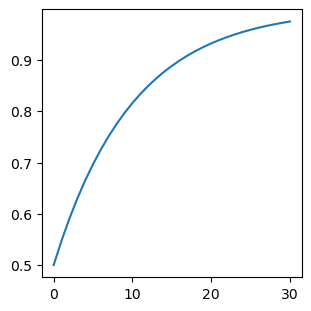

Python: [<matplotlib.lines.Line2D object at 0x2aab9be90>]

In [246]:
function prob_remember(num_quanta)
    return .5 .+ (1 .- exp.(.1*-(num_quanta)))./2
end

fig,ax = subplots(1, figsize = (3,3), constrained_layout=true)
ax.plot(0:30, prob_remember(0:30))

In [249]:
prob_remember(30)

0.975106465816068

In [163]:
2*(.5 - (1 - .5))

0.0

In [167]:
p_corr = .8
2*(p_corr - (1 - p_corr))

1.2000000000000002

In [171]:
p_corr = .65
4*(p_corr - (1 - p_corr))

1.2000000000000002